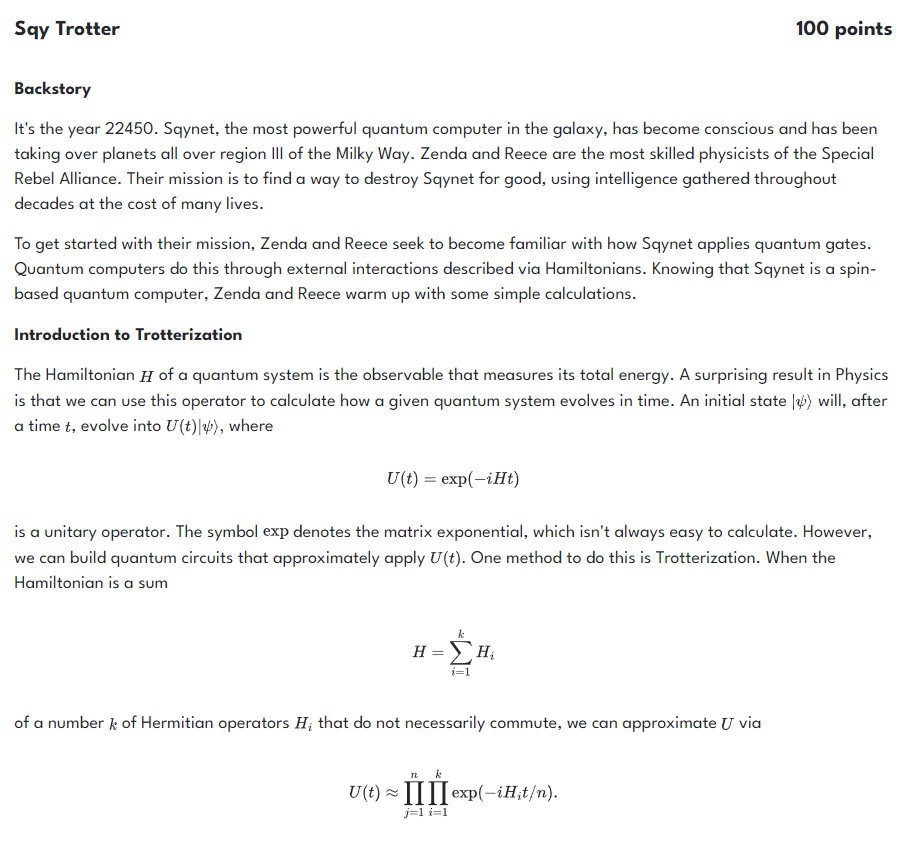

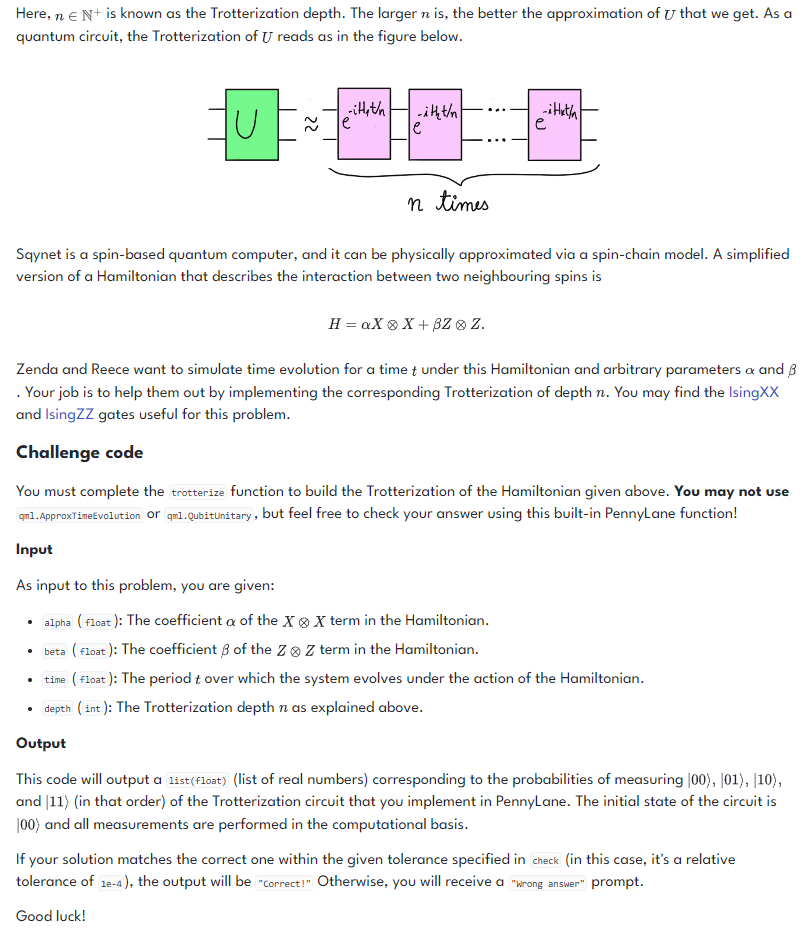

In [7]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def trotterize(alpha, beta, time, depth):
    """This quantum circuit implements the Trotterization of a Hamiltonian given by a linear combination
    of tensor products of X and Z Pauli gates.

    Args:
        alpha (float): The coefficient of the XX term in the Hamiltonian, as in the statement of the problem.
        beta (float): The coefficient of the YY term in the Hamiltonian, as in the statement of the problem.
        time (float): Time interval during which the quantum state evolves under the interactions specified by the Hamiltonian.
        depth (int): The Trotterization depth.

    Returns:
        (numpy.array): The probabilities of each measuring each computational basis state.
    """


    # Put your code here #
    #for i in range(depth):
    #    qml.IsingXX(alpha)
    #    qml.IsingZZ(beta)

    #*****
    #ZZ_qc.cnot(0,1)
    #ZZ_qc.rz(2 * t, 1)
    #ZZ_qc.cnot(0,1)
    #-----
    #XX_qc.h(0)
    #XX_qc.h(1)
    #XX_qc.append(ZZ, [0,1])
    #XX_qc.h(0)
    #XX_qc.h(1)
    #*****/
    
    for i in range(depth):
        qml.Hadamard(wires=0)
        qml.Hadamard(wires=1)
        qml.CNOT(wires=[0,1])
        qml.RZ(2*alpha*(time/depth),wires=1)
        qml.CNOT(wires=[0,1])
        qml.Hadamard(wires=0)
        qml.Hadamard(wires=1)
        
        qml.CNOT(wires=[0,1])
        qml.RZ(2*beta*(time/depth),wires=1)
        qml.CNOT(wires=[0,1])
    
    # Return the probabilities
    #result = qml.probs(wires=[0,1])
    #print(result)
    return qml.probs(wires=[0,1])

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    dev = qml.device("default.qubit", wires=2)
    ins = json.loads(test_case_input)
    output = list(trotterize(*ins).numpy())
    #print(output)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your circuit does not give the correct probabilities."

    tape = trotterize.qtape

    names = [op.name for op in tape.operations]
    
    assert names.count('ApproxTimeEvolution') == 0, "Your circuit is using the built-in PennyLane Trotterization"
    assert names.count('QubitUnitary') == 0, "Can't use custom-built gates!"


test_cases = [['[0.5,0.8,0.2,1]', '[0.99003329, 0, 0, 0.00996671]'], ['[0.9,1.0,0.4,2]', '[0.87590286, 0, 0, 0.12409714]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.5,0.8,0.2,1]'...
Correct!
Running test case 1 with input '[0.9,1.0,0.4,2]'...
Correct!
